# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

# Loading the Dataset and Selecting Variables

In [2]:
df_X_train = pd.read_csv('df_inputs_train.csv', index_col=0)
df_y_train = pd.read_csv('df_targets_train.csv', index_col=0) 
df_X_test = pd.read_csv('df_inputs_test.csv', index_col=0)
df_y_test = pd.read_csv('df_targets_test.csv', index_col=0) 

In [3]:
df_y_train.value_counts()

good_bad
1           143448
0            38096
Name: count, dtype: int64

In [4]:
df_y_test.value_counts()

good_bad
1           47643
0           12872
Name: count, dtype: int64

### Exploring Data

In [5]:
df_X_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35
452448,11324653,13236804,13150,13150,13150.0,23.70,513.85,F,F1,NaN,...,0,0,0,0,1,0,0,0,0,0
363441,19607169,21829881,5000,5000,5000.0,10.15,161.69,B,B2,Truck Driver,...,0,1,0,0,0,0,0,0,0,0
465236,10179630,12031182,24000,24000,24000.0,22.40,668.33,E,E3,Bailiff,...,0,0,0,0,0,0,1,0,0,0
194452,1575006,1843180,25000,25000,25000.0,23.28,708.79,F,F2,"KPMG, LLP",...,0,0,1,0,0,0,0,0,0,0
45189,10155973,12008043,25000,25000,25000.0,6.62,767.60,A,A2,CEO,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df_y_train.head()

,good_bad
452448,1
363441,1
465236,1
194452,1
45189,1


In [7]:
df_X_train.shape

(181544, 246)

In [8]:
df_y_train.shape

(181544, 1)

In [9]:
df_X_test.shape

(60515, 246)

In [10]:
df_y_test.shape

(60515, 1)

In [11]:
y_train = df_y_train
y_test = df_y_test

### Selecting Variables

In [12]:
# We choose a set of dummy variables associated with the original independent variables
X_train_with_refs = df_X_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_TN_MS_IN_NV',
'addr_state:AL_NM_OK',
'addr_state:FL_AR_LA',
'addr_state:MI_MO_PA',                                                                              
'addr_state:NY',
'addr_state:IA_NC_KY_OH_MD_HI',
'addr_state:NJ_VA_DE_MN_AZ',
'addr_state:WI_RI_GA',
'addr_state:SD_MA_IL_UT',                                       
'addr_state:CA',
'addr_state:MT_AK_WA_OR_SC',
'addr_state:TX',
'addr_state:VT_CT_WV_KS_CO',
'addr_state:NH_WY_ID_DC_ME',                                        
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',  
'purpose:sm_b__mov__oth__med__edu',                                       
'purpose:ren_en__vac__house__home_impr',
'purpose:debt_consolidation',                                            
'purpose:major_purch__wed__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                        
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6-9',
'emp_length:10',                                         
'mths_since_issue_d:<106',
'mths_since_issue_d:106-117',
'mths_since_issue_d:117-140',
'mths_since_issue_d:140-149',                                       
'mths_since_issue_d:149-156', 
'mths_since_issue_d:156-167',
'mths_since_issue_d:167-174',                                       
'mths_since_issue_d:>=174',  
'int_rate:<=8.31',
'int_rate:8.31-13.263',
'int_rate:13.263-18.63',
'int_rate:18.63-23.583',
'int_rate:>23.583',                                                                                                                             
'delinq_2yrs:0',
'delinq_2yrs:1',                                       
'delinq_2yrs:2-6',
'delinq_2yrs:>=7',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-5',
'inq_last_6mths:>=6',                                       
'pub_rec:0',
'pub_rec:1',                                       
'pub_rec:2-3',
'pub_rec:>=4',           
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'dti:<=5.6',
'dti:5.6-9.1',
'dti:9.1-13.3',
'dti:13.3-16.1',
'dti:16.1-18.2',
'dti:18.2-21',
'dti:21-24.5',
'dti:24.5-26.6',
'dti:26.6-35',
'dti:>35']]

In [13]:
# We consider the categories with the lowest WoE (highest risk) as the reference categories
ref_categories = ['grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',                  
'addr_state:ND_NE_TN_MS_IN_NV',
'verification_status:Verified',
'purpose:sm_b__mov__oth__med__edu',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=174',                 
'int_rate:>23.583',          
'delinq_2yrs:>=7',
'inq_last_6mths:>=6',
'pub_rec:>=4',
'acc_now_delinq:0',
'annual_inc:<20K',                       
'dti:>35']                

In [14]:
X_train = X_train_with_refs.drop(columns=ref_categories)
X_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_NM_OK,addr_state:FL_AR_LA,...,annual_inc:>150K,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35
452448,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
363441,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
465236,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
194452,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
45189,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


# PD Model Estimation

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
features = X_train.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:AL_NM_OK',
       'addr_state:FL_AR_LA', 'addr_state:MI_MO_PA', 'addr_state:NY',
       'addr_state:IA_NC_KY_OH_MD_HI', 'addr_state:NJ_VA_DE_MN_AZ',
       'addr_state:WI_RI_GA', 'addr_state:SD_MA_IL_UT', 'addr_state:CA',
       'addr_state:MT_AK_WA_OR_SC', 'addr_state:TX',
       'addr_state:VT_CT_WV_KS_CO', 'addr_state:NH_WY_ID_DC_ME',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:ren_en__vac__house__home_impr', 'purpose:debt_consolidation',
       'purpose:major_purch__wed__car', 'purpose:credit_card',
       'initial_list_status:w', 'term:36', 'emp_length:1', 'emp_length:2-5',
       'emp_length:6-9', 'emp_length:10', 'mths_since_issue_d:<106',
       'mths_since_issue_d:106-117', 'mths_since_issue_d:117-140',
       'mths_since_issue_d:140-149', 'mths_since_issue_d:149-156',
       'm

### Logistic Regression Model with P-Values

In [18]:
import scipy.stats as stat

class LogisticRegression_with_p_value:
    
    def __init__(self):                   
        self.model = LogisticRegression(class_weight='balanced', max_iter=100000, multi_class='ovr') 

    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2 * (1 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_value = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_value = p_value

In [19]:
clf_log = LogisticRegression_with_p_value()

In [20]:
X_train.shape

(181544, 74)

In [21]:
y_train.shape

(181544, 1)

In [22]:
X_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_NM_OK,addr_state:FL_AR_LA,...,annual_inc:>150K,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35
452448,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
363441,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
465236,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
194452,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
45189,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [23]:
clf_log.fit(X_train, y_train['good_bad'])

In [24]:
clf_log.intercept_

array([-4.01764681])

In [25]:
clf_log.coef_

array([[ 1.21393022,  0.92803809,  0.67929639,  0.46029433,  0.33981323,
         0.15505218,  0.11493144,  0.1502251 ,  0.03906924,  0.04655103,
         0.12328914,  0.06933773,  0.17075991,  0.13424089,  0.21045226,
         0.20280725,  0.20066853,  0.31489847,  0.28518222,  0.3764864 ,
         0.62348957,  0.0785939 , -0.01858273,  0.14367358,  0.19103172,
         0.3686212 ,  0.24368016,  0.0430407 ,  0.51529804,  0.16771387,
         0.16811848,  0.10949906,  0.14101671,  0.03620569,  0.10322449,
         0.34362386,  0.62674306,  0.62547005,  0.47563272,  0.24815912,
         0.70004845,  0.2181842 ,  0.05241755, -0.06764703,  0.35483298,
         0.32596408,  0.23059547,  0.58839133,  0.54192815,  0.39541504,
         0.18961902,  0.29520751,  0.23957872, -0.0921527 ,  0.04248048,
         0.17918599,  0.32878851,  0.41525411,  0.54040376,  0.61009049,
         0.69659055,  0.7304773 ,  0.77335003,  0.81426798,  0.77859972,
         0.75541089,  0.68047999,  0.59270838,  0.5

In [26]:
d = {'Feature Name': features, 'Coefficient':clf_log.coef_.reshape(clf_log.coef_.shape[1],)}
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':clf_log.intercept_[0]}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_value = clf_log.p_value
p_value = np.append(np.nan, np.array(p_value))  
summary_table['p_value'] = p_value                    
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-4.017647,NaN
1,grade:A,1.213930,1.024539e-45
2,grade:B,0.928038,5.191195e-30
3,grade:C,0.679296,2.977094e-18
4,grade:D,0.460294,1.739645e-09
5,grade:E,0.339813,7.157057e-06
6,grade:F,0.155052,2.305368e-02
7,home_ownership:OWN,0.114931,1.789920e-09
8,home_ownership:MORTGAGE,0.150225,2.596034e-37
9,addr_state:AL_NM_OK,0.039069,3.348997e-01


We choose features which are __statistically significant__ (p-values of all or most of the associated dummy variables < 0.05).<br>
We omit 'acc_now_delinq'.

In [27]:
X_train_with_refs = df_X_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_TN_MS_IN_NV',
'addr_state:AL_NM_OK',
'addr_state:FL_AR_LA',
'addr_state:MI_MO_PA',                                                                              
'addr_state:NY',
'addr_state:IA_NC_KY_OH_MD_HI',
'addr_state:NJ_VA_DE_MN_AZ',
'addr_state:WI_RI_GA',
'addr_state:SD_MA_IL_UT',                                       
'addr_state:CA',
'addr_state:MT_AK_WA_OR_SC',
'addr_state:TX',
'addr_state:VT_CT_WV_KS_CO',
'addr_state:NH_WY_ID_DC_ME',                                        
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',  
'purpose:sm_b__mov__oth__med__edu',                                       
'purpose:ren_en__vac__house__home_impr',
'purpose:debt_consolidation',                                            
'purpose:major_purch__wed__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                        
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6-9',
'emp_length:10',                                         
'mths_since_issue_d:<106',
'mths_since_issue_d:106-117',
'mths_since_issue_d:117-140',
'mths_since_issue_d:140-149',                                       
'mths_since_issue_d:149-156', 
'mths_since_issue_d:156-167',
'mths_since_issue_d:167-174',                                       
'mths_since_issue_d:>=174',  
'int_rate:<=8.31',
'int_rate:8.31-13.263',
'int_rate:13.263-18.63',
'int_rate:18.63-23.583',
'int_rate:>23.583',                                                                                                                             
'delinq_2yrs:0',
'delinq_2yrs:1',                                       
'delinq_2yrs:2-6',
'delinq_2yrs:>=7',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-5',
'inq_last_6mths:>=6',                                       
'pub_rec:0',
'pub_rec:1',                                       
'pub_rec:2-3',
'pub_rec:>=4',           
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'dti:<=5.6',
'dti:5.6-9.1',
'dti:9.1-13.3',
'dti:13.3-16.1',
'dti:16.1-18.2',
'dti:18.2-21',
'dti:21-24.5',
'dti:24.5-26.6',
'dti:26.6-35',
'dti:>35']]

In [28]:
ref_categories = ['grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',                  
'addr_state:ND_NE_TN_MS_IN_NV',
'verification_status:Verified',
'purpose:sm_b__mov__oth__med__edu',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=174',                 
'int_rate:>23.583',          
'delinq_2yrs:>=7',
'inq_last_6mths:>=6',
'pub_rec:>=4',
'annual_inc:<20K',                       
'dti:>35']

In [29]:
X_train = X_train_with_refs.drop(columns=ref_categories)
X_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_NM_OK,addr_state:FL_AR_LA,...,annual_inc:>150K,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35
452448,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
363441,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
465236,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
194452,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
45189,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [30]:
# We run a new logistic regression model with the new set of features
clf_log = LogisticRegression_with_p_value()
clf_log.fit(X_train, y_train['good_bad'])

In [31]:
features = X_train.columns
features

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:AL_NM_OK',
       'addr_state:FL_AR_LA', 'addr_state:MI_MO_PA', 'addr_state:NY',
       'addr_state:IA_NC_KY_OH_MD_HI', 'addr_state:NJ_VA_DE_MN_AZ',
       'addr_state:WI_RI_GA', 'addr_state:SD_MA_IL_UT', 'addr_state:CA',
       'addr_state:MT_AK_WA_OR_SC', 'addr_state:TX',
       'addr_state:VT_CT_WV_KS_CO', 'addr_state:NH_WY_ID_DC_ME',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:ren_en__vac__house__home_impr', 'purpose:debt_consolidation',
       'purpose:major_purch__wed__car', 'purpose:credit_card',
       'initial_list_status:w', 'term:36', 'emp_length:1', 'emp_length:2-5',
       'emp_length:6-9', 'emp_length:10', 'mths_since_issue_d:<106',
       'mths_since_issue_d:106-117', 'mths_since_issue_d:117-140',
       'mths_since_issue_d:140-149', 'mths_since_issue_d:149-156',
       'm

In [32]:
len(features)

73

In [33]:
d = {'Feature Name': features, 'Coefficient':clf_log.coef_.reshape(clf_log.coef_.shape[1],)}
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':clf_log.intercept_[0]}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_value = clf_log.p_value
p_value = np.append(np.nan, np.array(p_value))  
summary_table['p_value'] = p_value                    
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-4.012536,NaN
1,grade:A,1.211471,1.456308e-45
2,grade:B,0.925172,7.446687e-30
3,grade:C,0.676234,4.096285e-18
4,grade:D,0.457151,2.211549e-09
5,grade:E,0.337031,8.434784e-06
6,grade:F,0.152396,2.544408e-02
7,home_ownership:OWN,0.114863,1.829200e-09
8,home_ownership:MORTGAGE,0.150199,2.657383e-37
9,addr_state:AL_NM_OK,0.038388,3.433819e-01


In [34]:
y_pred_train = clf_log.model.predict(X_train)

In [35]:
accuracy_score(y_true=y_train, y_pred=y_pred_train)      

0.6407647732781033

In [36]:
f1_score(y_true=y_train, y_pred=y_pred_train, average=None, labels=[0,1])

array([0.43536532, 0.73658743])

In [37]:
import pickle
with open('pd_log_model.sav', 'wb') as f:
    pickle.dump(clf_log, f)

# Logistic Regression Model Validation 

In [38]:
X_test_with_refs = df_X_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_TN_MS_IN_NV',
'addr_state:AL_NM_OK',
'addr_state:FL_AR_LA',
'addr_state:MI_MO_PA',                                                                              
'addr_state:NY',
'addr_state:IA_NC_KY_OH_MD_HI',
'addr_state:NJ_VA_DE_MN_AZ',
'addr_state:WI_RI_GA',
'addr_state:SD_MA_IL_UT',                                       
'addr_state:CA',
'addr_state:MT_AK_WA_OR_SC',
'addr_state:TX',
'addr_state:VT_CT_WV_KS_CO',
'addr_state:NH_WY_ID_DC_ME',                                        
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',  
'purpose:sm_b__mov__oth__med__edu',                                       
'purpose:ren_en__vac__house__home_impr',
'purpose:debt_consolidation',                                            
'purpose:major_purch__wed__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                        
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6-9',
'emp_length:10',                                         
'mths_since_issue_d:<106',
'mths_since_issue_d:106-117',
'mths_since_issue_d:117-140',
'mths_since_issue_d:140-149',                                       
'mths_since_issue_d:149-156', 
'mths_since_issue_d:156-167',
'mths_since_issue_d:167-174',                                       
'mths_since_issue_d:>=174',  
'int_rate:<=8.31',
'int_rate:8.31-13.263',
'int_rate:13.263-18.63',
'int_rate:18.63-23.583',
'int_rate:>23.583',                                                                                                                             
'delinq_2yrs:0',
'delinq_2yrs:1',                                       
'delinq_2yrs:2-6',
'delinq_2yrs:>=7',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-5',
'inq_last_6mths:>=6',                                       
'pub_rec:0',
'pub_rec:1',                                       
'pub_rec:2-3',
'pub_rec:>=4',           
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'dti:<=5.6',
'dti:5.6-9.1',
'dti:9.1-13.3',
'dti:13.3-16.1',
'dti:16.1-18.2',
'dti:18.2-21',
'dti:21-24.5',
'dti:24.5-26.6',
'dti:26.6-35',
'dti:>35']]

In [39]:
ref_categories = ['grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',                  
'addr_state:ND_NE_TN_MS_IN_NV',
'verification_status:Verified',
'purpose:sm_b__mov__oth__med__edu',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=174',                 
'int_rate:>23.583',          
'delinq_2yrs:>=7',
'inq_last_6mths:>=6',
'pub_rec:>=4',
'annual_inc:<20K',                       
'dti:>35']

In [40]:
X_test = X_test_with_refs.drop(columns=ref_categories)
X_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_NM_OK,addr_state:FL_AR_LA,...,annual_inc:>150K,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35
23239,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
376786,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
156345,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28479,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
323809,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
y_pred_test = clf_log.model.predict(X_test)
y_pred_test

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [42]:
y_pred_proba = clf_log.model.predict_proba(X_test)
y_pred_proba

array([[0.39507924, 0.60492076],
       [0.13785672, 0.86214328],
       [0.67019331, 0.32980669],
       ...,
       [0.44757137, 0.55242863],
       [0.34337935, 0.65662065],
       [0.62098037, 0.37901963]])

In [43]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.60492076, 0.86214328, 0.32980669, ..., 0.55242863, 0.65662065,
       0.37901963])

In [44]:
df_y_test_temp = df_y_test
df_y_test_temp.reset_index(drop=True, inplace=True)
df_y_test_temp.head()

,good_bad
0,1
1,1
2,0
3,1
4,0


In [45]:
df_true_pred_probs = pd.concat([df_y_test_temp, pd.DataFrame(y_pred_proba)], axis=1)

In [46]:
df_true_pred_probs.shape

(60515, 2)

In [47]:
df_true_pred_probs.columns = ['targets_test', 'y_pred_proba']
df_true_pred_probs.index = df_X_test.index
df_true_pred_probs.head()

,targets_test,y_pred_proba
23239,1,0.604921
376786,1,0.862143
156345,0,0.329807
28479,1,0.433157
323809,0,0.486423


In [48]:
accuracy_score(y_true=y_test['good_bad'], y_pred=y_pred_test)  

0.6420061141865653

In [49]:
f1_score(y_true=y_test, y_pred=y_pred_test, average=None, labels=[0,1])

array([0.43846553, 0.73724682])

### Confusion Matrix-Log

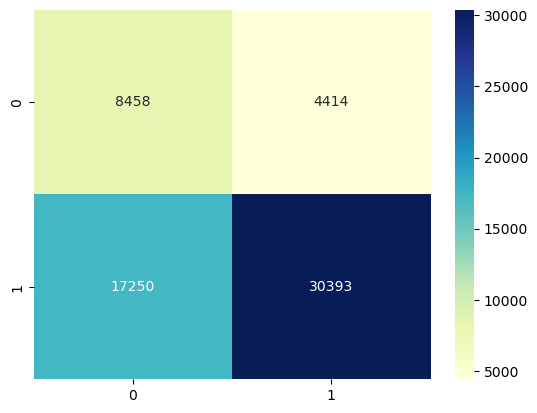

In [50]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_test, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [51]:
print(classification_report(y_true=y_test,y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.33      0.66      0.44     12872
           1       0.87      0.64      0.74     47643

    accuracy                           0.64     60515
   macro avg       0.60      0.65      0.59     60515
weighted avg       0.76      0.64      0.67     60515



### Area Under the ROC Curve (AUROC)

In [52]:
roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of true values and their pred probabilities.

(array([0.        , 0.        , 0.        , ..., 0.99976694, 0.99976694,
        1.        ]),
 array([0.00000000e+00, 2.09894423e-05, 1.42728208e-03, ...,
        9.99979011e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.94213584, 0.91195312, ..., 0.0991566 , 0.08975415,
        0.07568915]))

In [53]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

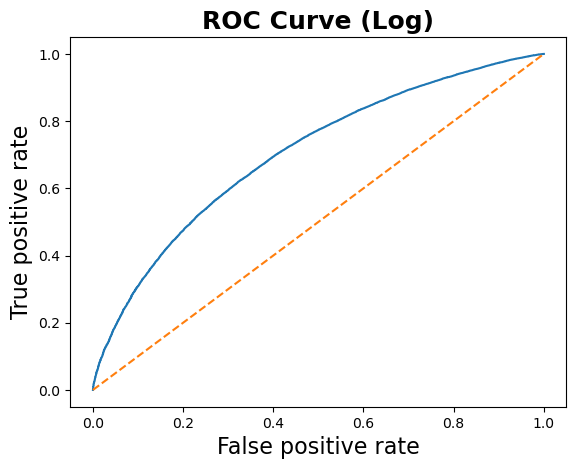

In [54]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('False positive rate', size=16)
plt.ylabel('True positive rate', size=16)
plt.title('ROC Curve (Log)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [55]:
AUROC = roc_auc_score(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC

0.7028086241483182

### Gini Coefficient

In [56]:
df_true_pred_probs = df_true_pred_probs.sort_values('y_pred_proba')
df_true_pred_probs.head()

,targets_test,y_pred_proba
340725,0,0.075689
391181,0,0.076093
151440,0,0.079834
275274,1,0.089754
315335,0,0.099157


In [57]:
df_true_pred_probs.tail()

,targets_test,y_pred_proba
26893,1,0.930716
29394,1,0.932380
32289,1,0.935483
26283,1,0.941134
33411,1,0.942136


In [58]:
df_true_pred_probs = df_true_pred_probs.reset_index()
df_true_pred_probs.head()

,index,targets_test,y_pred_proba
0,340725,0,0.075689
1,391181,0,0.076093
2,151440,0,0.079834
3,275274,1,0.089754
4,315335,0,0.099157


In [59]:
df_true_pred_probs['Cumulative N Population'] = df_true_pred_probs.index + 1    # Cumulative number of all observations
df_true_pred_probs['Cumulative N Good'] = df_true_pred_probs['targets_test'].cumsum() # Cumulative number of 'good' borrowers
df_true_pred_probs['Cumulative N Bad'] = df_true_pred_probs['Cumulative N Population'] - df_true_pred_probs['Cumulative N Good']
# Cumulative number of 'bad' borrowers

In [60]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,340725,0,0.075689,1,0,1
1,391181,0,0.076093,2,0,2
2,151440,0,0.079834,3,0,3
3,275274,1,0.089754,4,1,3
4,315335,0,0.099157,5,1,4


In [61]:
df_true_pred_probs['Cumulative Perc Population'] = df_true_pred_probs['Cumulative N Population'] / (df_true_pred_probs.index[-1] + 1)
# Cumulative percentage of all observations
df_true_pred_probs['Cumulative Perc Good'] = df_true_pred_probs['Cumulative N Good'] / df_true_pred_probs['targets_test'].sum()
# Cumulative percentage of 'good' borrowers
df_true_pred_probs['Cumulative Perc Bad'] = df_true_pred_probs['Cumulative N Bad'] / ((df_true_pred_probs.index[-1] + 1) - df_true_pred_probs['targets_test'].sum())
# Cumulative percentage of 'bad' borrowers

In [62]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,340725,0,0.075689,1,0,1,0.000017,0.000000,0.000078
1,391181,0,0.076093,2,0,2,0.000033,0.000000,0.000155
2,151440,0,0.079834,3,0,3,0.000050,0.000000,0.000233
3,275274,1,0.089754,4,1,3,0.000066,0.000021,0.000233
4,315335,0,0.099157,5,1,4,0.000083,0.000021,0.000311


In [63]:
df_true_pred_probs.tail()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
60510,26893,1,0.930716,60511,47639,12872,0.999934,0.999916,1.0
60511,29394,1,0.932380,60512,47640,12872,0.999950,0.999937,1.0
60512,32289,1,0.935483,60513,47641,12872,0.999967,0.999958,1.0
60513,26283,1,0.941134,60514,47642,12872,0.999983,0.999979,1.0
60514,33411,1,0.942136,60515,47643,12872,1.000000,1.000000,1.0


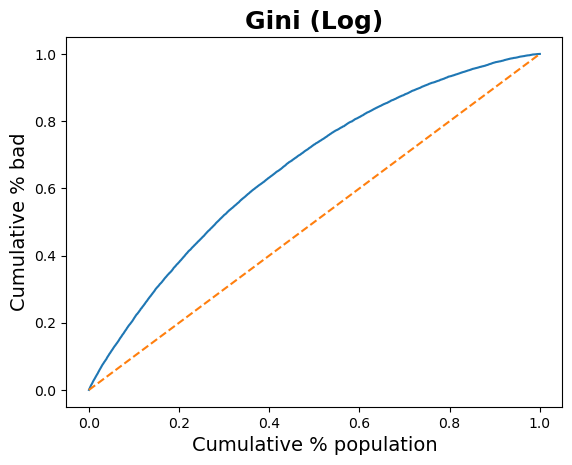

In [64]:
plt.plot(df_true_pred_probs['Cumulative Perc Population'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('Cumulative % population', size=14)
plt.ylabel('Cumulative % bad', size=14)
plt.title('Gini (Log)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [65]:
Gini = 2 * AUROC  - 1
Gini

0.4056172482966365

### Kolmogorov-Smirnov Coefficient

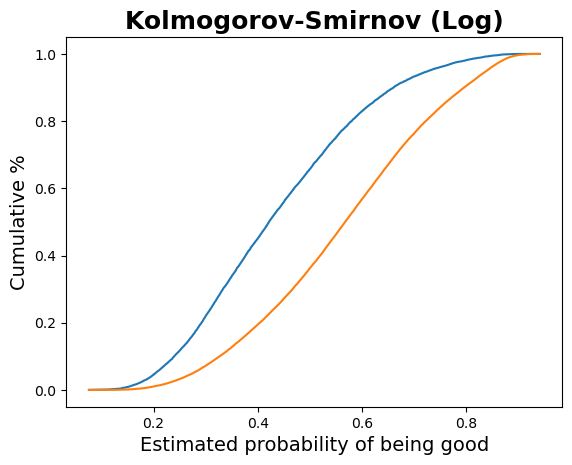

In [66]:
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Good'])
plt.xlabel('Estimated probability of being good', size=14)       # Predicted Probability of being Good (Non-defaulted)
plt.ylabel('Cumulative %', size=14)
plt.title('Kolmogorov-Smirnov (Log)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [67]:
KS = max(df_true_pred_probs['Cumulative Perc Bad'] - df_true_pred_probs['Cumulative Perc Good'])
KS

0.29748033942158914

### PD Model Using Artificial Neural Networks

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
model = Sequential()

u1 = len(features)
model.add(Dense(u1, activation='relu'))

u2 = round(len(features) * 0.5)
model.add(Dense(u2, activation='relu'))
#model.add(Dropout(0.2))                      

u3 = round(len(features) * 0.25)
model.add(Dense(u3, activation='relu'))
#model.add(Dropout(0.2))  
                
model.add(Dense(1, activation='sigmoid'))   
                
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])    # adam, SGD, Adagrad, RMSprop    

In [70]:
y_train.value_counts()

good_bad
1           143448
0            38096
Name: count, dtype: int64

In [71]:
len(y_train[y_train['good_bad']==1]) / len(y_train[y_train['good_bad']==0])

3.765434691306174

In [72]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0, verbose=1)   
class_weight = {0:3, 1:1}

In [73]:
model.fit(x=X_train, y=y_train, class_weight=class_weight ,batch_size=1024, epochs=10, validation_data=(X_test,y_test), callbacks=[early_stop]);

Epoch 1/10


178/178 [==============================] - 5s 20ms/step - loss: 0.9064 - accuracy: 0.6924 - val_loss: 0.5629 - val_accuracy: 0.7089
Epoch 2/10
178/178 [==============================] - 1s 6ms/step - loss: 0.8850 - accuracy: 0.6925 - val_loss: 0.5791 - val_accuracy: 0.6932
Epoch 2: early stopping


In [74]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.906393,0.692438,0.562949,0.708948
1,0.884965,0.692510,0.579072,0.693250


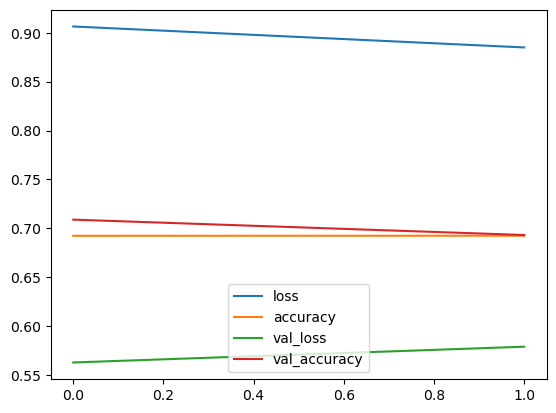

In [75]:
losses.plot();

In [76]:
y_pred_test = np.round(model.predict(X_test)).astype('int')
y_pred_test

1892/1892 [==============================] - 3s 2ms/step


array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

### Confusion Matrix (ANNs)

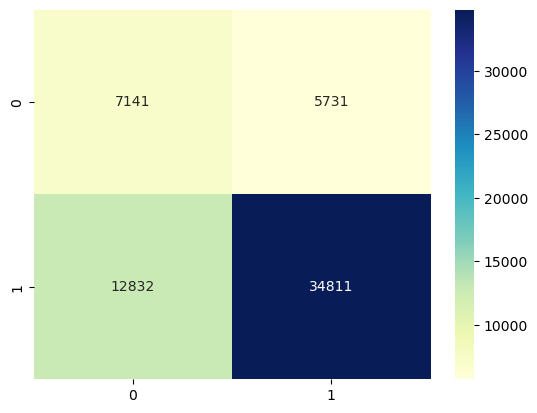

In [77]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_test, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [78]:
print(classification_report(y_true=y_test,y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.36      0.55      0.43     12872
           1       0.86      0.73      0.79     47643

    accuracy                           0.69     60515
   macro avg       0.61      0.64      0.61     60515
weighted avg       0.75      0.69      0.71     60515



In [79]:
y_pred_proba = model.predict(X_test)
y_pred_proba

1892/1892 [==============================] - 3s 2ms/step


array([[0.6618297 ],
       [0.8953379 ],
       [0.4217707 ],
       ...,
       [0.580832  ],
       [0.7017375 ],
       [0.45009637]], dtype=float32)

In [80]:
df_y_test_temp = df_y_test
df_y_test_temp.reset_index(drop=True, inplace=True)
df_y_test_temp.head()

,good_bad
0,1
1,1
2,0
3,1
4,0


In [81]:
df_true_pred_probs = pd.concat([df_y_test_temp, pd.DataFrame(y_pred_proba)], axis=1)

In [82]:
df_true_pred_probs.shape

(60515, 2)

In [83]:
df_true_pred_probs.columns = ['targets_test', 'y_pred_proba']
df_true_pred_probs.index = df_X_test.index
df_true_pred_probs.head()

,targets_test,y_pred_proba
23239,1,0.661830
376786,1,0.895338
156345,0,0.421771
28479,1,0.480158
323809,0,0.553764


In [85]:
model.save('pd_ann_model.h5')

C:\Users\m10sa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# PD Model Validation (ANNs)

In [86]:
accuracy_score(y_true=y_test['good_bad'], y_pred=y_pred_test)  

0.6932496075353218

In [87]:
f1_score(y_true=y_test, y_pred=y_pred_test, average=None, labels=[0,1])

array([0.43483026, 0.78949935])

### Area Under the ROC Curve (AUROC)

In [88]:
roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of true values and their pred probabilities.

(array([0.        , 0.        , 0.        , ..., 0.99984462, 0.99984462,
        1.        ]),
 array([0.00000000e+00, 2.09894423e-05, 1.34332431e-03, ...,
        9.99937032e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9336858 , 0.91695064, ..., 0.15865129, 0.15551765,
        0.1534031 ], dtype=float32))

In [89]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

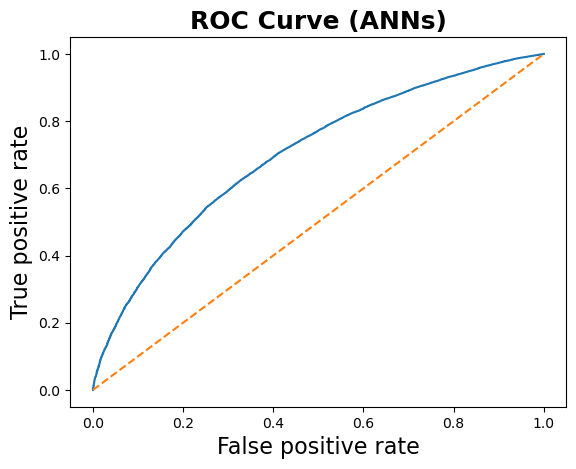

In [90]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('False positive rate', size=16)
plt.ylabel('True positive rate', size=16)
plt.title('ROC Curve (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [91]:
AUROC = roc_auc_score(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC

0.7018931684478928

### Gini Coefficient

In [92]:
df_true_pred_probs = df_true_pred_probs.sort_values('y_pred_proba')
df_true_pred_probs.head()

,targets_test,y_pred_proba
436399,0,0.153403
240016,0,0.155095
234199,1,0.155518
332945,1,0.156592
412944,1,0.158615


In [93]:
df_true_pred_probs.tail()

,targets_test,y_pred_proba
30922,1,0.928927
227245,1,0.929071
19649,1,0.930526
22343,1,0.931286
33411,1,0.933686


In [94]:
df_true_pred_probs = df_true_pred_probs.reset_index()
df_true_pred_probs.head()

,index,targets_test,y_pred_proba
0,436399,0,0.153403
1,240016,0,0.155095
2,234199,1,0.155518
3,332945,1,0.156592
4,412944,1,0.158615


In [95]:
df_true_pred_probs['Cumulative N Population'] = df_true_pred_probs.index + 1    # Cumulative number of all observations
df_true_pred_probs['Cumulative N Good'] = df_true_pred_probs['targets_test'].cumsum() # Cumulative number of 'good' borrowers
df_true_pred_probs['Cumulative N Bad'] = df_true_pred_probs['Cumulative N Population'] - df_true_pred_probs['Cumulative N Good']
# Cumulative number of 'bad' borrowers

In [96]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,436399,0,0.153403,1,0,1
1,240016,0,0.155095,2,0,2
2,234199,1,0.155518,3,1,2
3,332945,1,0.156592,4,2,2
4,412944,1,0.158615,5,3,2


In [97]:
df_true_pred_probs['Cumulative Perc Population'] = df_true_pred_probs['Cumulative N Population'] / (df_true_pred_probs.index[-1] + 1)
# Cumulative percentage of all observations
df_true_pred_probs['Cumulative Perc Good'] = df_true_pred_probs['Cumulative N Good'] / df_true_pred_probs['targets_test'].sum()
# Cumulative percentage of 'good' borrowers
df_true_pred_probs['Cumulative Perc Bad'] = df_true_pred_probs['Cumulative N Bad'] / ((df_true_pred_probs.index[-1] + 1) - df_true_pred_probs['targets_test'].sum())
# Cumulative percentage of 'bad' borrowers

In [98]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,436399,0,0.153403,1,0,1,0.000017,0.000000,0.000078
1,240016,0,0.155095,2,0,2,0.000033,0.000000,0.000155
2,234199,1,0.155518,3,1,2,0.000050,0.000021,0.000155
3,332945,1,0.156592,4,2,2,0.000066,0.000042,0.000155
4,412944,1,0.158615,5,3,2,0.000083,0.000063,0.000155


In [99]:
df_true_pred_probs.tail()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
60510,30922,1,0.928927,60511,47639,12872,0.999934,0.999916,1.0
60511,227245,1,0.929071,60512,47640,12872,0.999950,0.999937,1.0
60512,19649,1,0.930526,60513,47641,12872,0.999967,0.999958,1.0
60513,22343,1,0.931286,60514,47642,12872,0.999983,0.999979,1.0
60514,33411,1,0.933686,60515,47643,12872,1.000000,1.000000,1.0


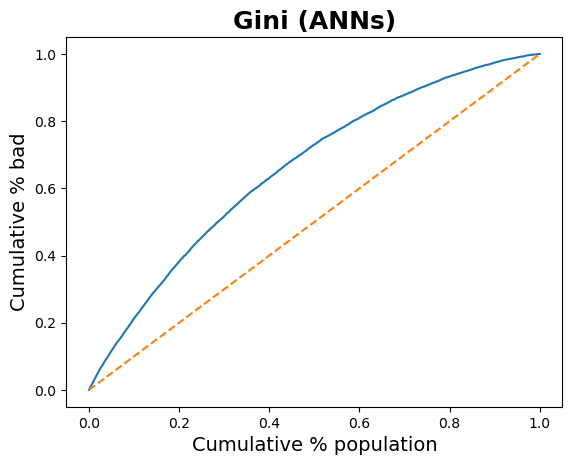

In [100]:
plt.plot(df_true_pred_probs['Cumulative Perc Population'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('Cumulative % population', size=14)
plt.ylabel('Cumulative % bad', size=14)
plt.title('Gini (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [101]:
Gini = 2 * AUROC  - 1
Gini

0.4037863368957857

### Kolmogorov-Smirnov Coefficient

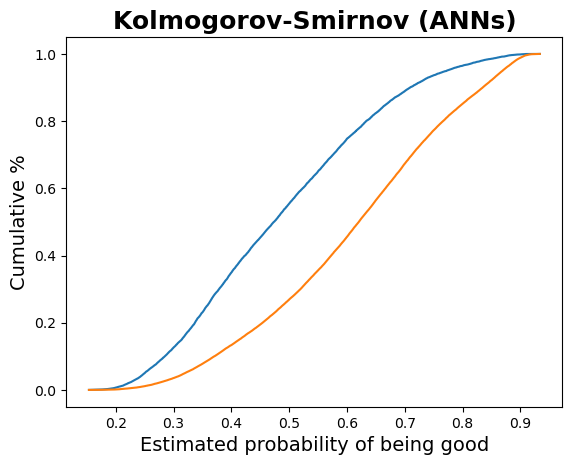

In [102]:
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Good'])
plt.xlabel('Estimated probability of being good', size=14)       # Predicted Probability of being Good (Non-defaulted)
plt.ylabel('Cumulative %', size=14)
plt.title('Kolmogorov-Smirnov (ANNs)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [103]:
KS = max(df_true_pred_probs['Cumulative Perc Bad'] - df_true_pred_probs['Cumulative Perc Good'])
KS

0.296559269469309

# Applying the PD Model

In [104]:
X_test_with_refs.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35
23239,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
376786,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
156345,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
28479,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
323809,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-4.012536,NaN
1,grade:A,1.211471,1.456308e-45
2,grade:B,0.925172,7.446687e-30
3,grade:C,0.676234,4.096285e-18
4,grade:D,0.457151,2.211549e-09
5,grade:E,0.337031,8.434784e-06
6,grade:F,0.152396,2.544408e-02
7,home_ownership:OWN,0.114863,1.829200e-09
8,home_ownership:MORTGAGE,0.150199,2.657383e-37
9,addr_state:AL_NM_OK,0.038388,3.433819e-01


In [106]:
y_pred_proba

array([[0.6618297 ],
       [0.8953379 ],
       [0.4217707 ],
       ...,
       [0.580832  ],
       [0.7017375 ],
       [0.45009637]], dtype=float32)

### Creating a Credit Scorecard 

In [107]:
# Using the Logistic Regression Model for PD
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-4.012536,NaN
1,grade:A,1.211471,1.456308e-45
2,grade:B,0.925172,7.446687e-30
3,grade:C,0.676234,4.096285e-18
4,grade:D,0.457151,2.211549e-09
5,grade:E,0.337031,8.434784e-06
6,grade:F,0.152396,2.544408e-02
7,home_ownership:OWN,0.114863,1.829200e-09
8,home_ownership:MORTGAGE,0.150199,2.657383e-37
9,addr_state:AL_NM_OK,0.038388,3.433819e-01


In [108]:
ref_categories

['grade:G',
 'home_ownership:OTHER_NONE_RENT_ANY',
 'addr_state:ND_NE_TN_MS_IN_NV',
 'verification_status:Verified',
 'purpose:sm_b__mov__oth__med__edu',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>=174',
 'int_rate:>23.583',
 'delinq_2yrs:>=7',
 'inq_last_6mths:>=6',
 'pub_rec:>=4',
 'annual_inc:<20K',
 'dti:>35']

We need to add reference categiries to the summary table for creating a scorecard.

In [109]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature Name'])
df_ref_categories['Coefficient'] = 0
df_ref_categories['p_value'] = np.nan
df_ref_categories

,Feature Name,Coefficient,p_value
0,grade:G,0,NaN
1,home_ownership:OTHER_NONE_RENT_ANY,0,NaN
2,addr_state:ND_NE_TN_MS_IN_NV,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:sm_b__mov__oth__med__edu,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>=174,0,NaN
9,int_rate:>23.583,0,NaN


In [110]:
df_scorecard = pd.concat([summary_table, df_ref_categories], axis=0)  
df_scorecard = df_scorecard.reset_index(drop=True)
df_scorecard

,Feature Name,Coefficient,p_value
0,intercept,-4.012536,NaN
1,grade:A,1.211471,1.456308e-45
2,grade:B,0.925172,7.446687e-30
3,grade:C,0.676234,4.096285e-18
4,grade:D,0.457151,2.211549e-09
5,grade:E,0.337031,8.434784e-06
6,grade:F,0.152396,2.544408e-02
7,home_ownership:OWN,0.114863,1.829200e-09
8,home_ownership:MORTGAGE,0.150199,2.657383e-37
9,addr_state:AL_NM_OK,0.038388,3.433819e-01


In [111]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].str.split(':').str[0]
df_scorecard

,Feature Name,Coefficient,p_value,Original Feature Name
0,intercept,-4.012536,NaN,intercept
1,grade:A,1.211471,1.456308e-45,grade
2,grade:B,0.925172,7.446687e-30,grade
3,grade:C,0.676234,4.096285e-18,grade
4,grade:D,0.457151,2.211549e-09,grade
5,grade:E,0.337031,8.434784e-06,grade
6,grade:F,0.152396,2.544408e-02,grade
7,home_ownership:OWN,0.114863,1.829200e-09,home_ownership
8,home_ownership:MORTGAGE,0.150199,2.657383e-37,home_ownership
9,addr_state:AL_NM_OK,0.038388,3.433819e-01,addr_state


In [112]:
df_scorecard.columns

Index(['Feature Name', 'Coefficient', 'p_value', 'Original Feature Name'], dtype='object')

In [113]:
# We reorder the columns
df_scorecard = df_scorecard[['Original Feature Name', 'Feature Name', 'Coefficient', 'p_value']]

In [114]:
min_score = 300
max_score = 850

In [115]:
sum_min_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].min().sum()
sum_min_coef

-4.097352245417672

In [116]:
sum_max_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].max().sum()
sum_max_coef

3.281606400821258

In [117]:
df_scorecard['Norm_Score'] = df_scorecard['Coefficient'] * (max_score - min_score) / (sum_max_coef - sum_min_coef)
df_scorecard

C:\Users\m10sa\AppData\Local\Temp\ipykernel_20988\3276260229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Norm_Score'] = df_scorecard['Coefficient'] * (max_score - min_score) / (sum_max_coef - sum_min_coef)


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score
0,intercept,intercept,-4.012536,NaN,-299.079469
1,grade,grade:A,1.211471,1.456308e-45,90.298545
2,grade,grade:B,0.925172,7.446687e-30,68.958833
3,grade,grade:C,0.676234,4.096285e-18,50.403941
4,grade,grade:D,0.457151,2.211549e-09,34.074313
5,grade,grade:E,0.337031,8.434784e-06,25.121018
6,grade,grade:F,0.152396,2.544408e-02,11.359056
7,home_ownership,home_ownership:OWN,0.114863,1.829200e-09,8.561454
8,home_ownership,home_ownership:MORTGAGE,0.150199,2.657383e-37,11.195299
9,addr_state,addr_state:AL_NM_OK,0.038388,3.433819e-01,2.861295


The normalized intercept should be close to the min_score.

In [118]:
df_scorecard.loc[0, 'Norm_Score'] = ((df_scorecard.loc[0, 'Coefficient'] - sum_min_coef) / (sum_max_coef - sum_min_coef)) * (max_score - min_score) + min_score
df_scorecard

,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score
0,intercept,intercept,-4.012536,NaN,306.321854
1,grade,grade:A,1.211471,1.456308e-45,90.298545
2,grade,grade:B,0.925172,7.446687e-30,68.958833
3,grade,grade:C,0.676234,4.096285e-18,50.403941
4,grade,grade:D,0.457151,2.211549e-09,34.074313
5,grade,grade:E,0.337031,8.434784e-06,25.121018
6,grade,grade:F,0.152396,2.544408e-02,11.359056
7,home_ownership,home_ownership:OWN,0.114863,1.829200e-09,8.561454
8,home_ownership,home_ownership:MORTGAGE,0.150199,2.657383e-37,11.195299
9,addr_state,addr_state:AL_NM_OK,0.038388,3.433819e-01,2.861295


In [119]:
df_scorecard['Rounded_Norm_Score'] = df_scorecard['Norm_Score'].round()
df_scorecard

C:\Users\m10sa\AppData\Local\Temp\ipykernel_20988\2712398310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Rounded_Norm_Score'] = df_scorecard['Norm_Score'].round()


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score,Rounded_Norm_Score
0,intercept,intercept,-4.012536,NaN,306.321854,306.0
1,grade,grade:A,1.211471,1.456308e-45,90.298545,90.0
2,grade,grade:B,0.925172,7.446687e-30,68.958833,69.0
3,grade,grade:C,0.676234,4.096285e-18,50.403941,50.0
4,grade,grade:D,0.457151,2.211549e-09,34.074313,34.0
5,grade,grade:E,0.337031,8.434784e-06,25.121018,25.0
6,grade,grade:F,0.152396,2.544408e-02,11.359056,11.0
7,home_ownership,home_ownership:OWN,0.114863,1.829200e-09,8.561454,9.0
8,home_ownership,home_ownership:MORTGAGE,0.150199,2.657383e-37,11.195299,11.0
9,addr_state,addr_state:AL_NM_OK,0.038388,3.433819e-01,2.861295,3.0


In [120]:
sum_min_rn_score = df_scorecard.groupby('Original Feature Name')['Rounded_Norm_Score'].min().sum()
sum_min_rn_score

300.0

In [121]:
sum_max_rn_score = df_scorecard.groupby('Original Feature Name')['Rounded_Norm_Score'].max().sum()
sum_max_rn_score

850.0

In [122]:
df_scorecard.groupby('Original Feature Name')['Norm_Score'].max()

Original Feature Name
addr_state              46.626962
annual_inc              60.714867
delinq_2yrs             26.329418
dti                     56.191962
emp_length              12.534027
grade                   90.298545
home_ownership          11.195299
initial_list_status      3.217653
inq_last_6mths          43.955454
int_rate                52.242634
intercept              306.321854
mths_since_issue_d      46.614335
pub_rec                 21.968815
purpose                 27.514933
term                    38.399964
verification_status      5.873277
Name: Norm_Score, dtype: float64

### Caclulating Credit Score

In [123]:
X_test_with_refs.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35
23239,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
376786,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
156345,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
28479,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
323809,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
df_scorecard

,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score,Rounded_Norm_Score
0,intercept,intercept,-4.012536,NaN,306.321854,306.0
1,grade,grade:A,1.211471,1.456308e-45,90.298545,90.0
2,grade,grade:B,0.925172,7.446687e-30,68.958833,69.0
3,grade,grade:C,0.676234,4.096285e-18,50.403941,50.0
4,grade,grade:D,0.457151,2.211549e-09,34.074313,34.0
5,grade,grade:E,0.337031,8.434784e-06,25.121018,25.0
6,grade,grade:F,0.152396,2.544408e-02,11.359056,11.0
7,home_ownership,home_ownership:OWN,0.114863,1.829200e-09,8.561454,9.0
8,home_ownership,home_ownership:MORTGAGE,0.150199,2.657383e-37,11.195299,11.0
9,addr_state,addr_state:AL_NM_OK,0.038388,3.433819e-01,2.861295,3.0


In [125]:
X_test_with_refs_and_intercept = X_test_with_refs

In [126]:
X_test_with_refs_and_intercept.insert(0, 'intercept', 1)    
X_test_with_refs_and_intercept.head()
# We insert a column of 1's in the dataframe as the first column with the name 'intercept' used for matrix multiplication.

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:OWN,...,dti:<=5.6,dti:5.6-9.1,dti:9.1-13.3,dti:13.3-16.1,dti:16.1-18.2,dti:18.2-21,dti:21-24.5,dti:24.5-26.6,dti:26.6-35,dti:>35
23239,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
376786,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
156345,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28479,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
323809,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
X_test_with_refs_and_intercept = X_test_with_refs_and_intercept[df_scorecard['Feature Name'].values] 
X_test_with_refs_and_intercept.head()
# We sort the columns in the same order as df_scorecard' rows

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_NM_OK,...,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>=174,int_rate:>23.583,delinq_2yrs:>=7,inq_last_6mths:>=6,pub_rec:>=4,annual_inc:<20K,dti:>35
23239,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
376786,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
156345,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28479,1,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
323809,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
 df_scorecard[['Original Feature Name', 'Feature Name', 'Rounded_Norm_Score']]   

,Original Feature Name,Feature Name,Rounded_Norm_Score
0,intercept,intercept,306.0
1,grade,grade:A,90.0
2,grade,grade:B,69.0
3,grade,grade:C,50.0
4,grade,grade:D,34.0
5,grade,grade:E,25.0
6,grade,grade:F,11.0
7,home_ownership,home_ownership:OWN,9.0
8,home_ownership,home_ownership:MORTGAGE,11.0
9,addr_state,addr_state:AL_NM_OK,3.0


In [129]:
scorecard_scores = df_scorecard['Rounded_Norm_Score']  
scorecard_scores

0     306.0
1      90.0
2      69.0
3      50.0
4      34.0
5      25.0
6      11.0
7       9.0
8      11.0
9       3.0
10      3.0
11      9.0
12      5.0
13     13.0
14     10.0
15     16.0
16     15.0
17     15.0
18     23.0
19     21.0
20     28.0
21     47.0
22      6.0
23     -1.0
24     11.0
25     14.0
26     28.0
27     18.0
28      3.0
29     38.0
30     13.0
31     13.0
32      8.0
33     11.0
34      3.0
35      8.0
36     26.0
37     47.0
38     46.0
39     35.0
40     18.0
41     52.0
42     16.0
43      4.0
44     -5.0
45     26.0
46     24.0
47     17.0
48     44.0
49     40.0
50     30.0
51     14.0
52     22.0
53     18.0
54      3.0
55     13.0
56     25.0
57     31.0
58     40.0
59     45.0
60     52.0
61     54.0
62     58.0
63     61.0
64     58.0
65     56.0
66     51.0
67     44.0
68     39.0
69     35.0
70     30.0
71     25.0
72     19.0
73     14.0
74      0.0
75      0.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [130]:
X_test_with_refs_and_intercept.shape

(60515, 89)

In [131]:
scorecard_scores.shape

(89,)

In [132]:
scorecard_scores

0     306.0
1      90.0
2      69.0
3      50.0
4      34.0
5      25.0
6      11.0
7       9.0
8      11.0
9       3.0
10      3.0
11      9.0
12      5.0
13     13.0
14     10.0
15     16.0
16     15.0
17     15.0
18     23.0
19     21.0
20     28.0
21     47.0
22      6.0
23     -1.0
24     11.0
25     14.0
26     28.0
27     18.0
28      3.0
29     38.0
30     13.0
31     13.0
32      8.0
33     11.0
34      3.0
35      8.0
36     26.0
37     47.0
38     46.0
39     35.0
40     18.0
41     52.0
42     16.0
43      4.0
44     -5.0
45     26.0
46     24.0
47     17.0
48     44.0
49     40.0
50     30.0
51     14.0
52     22.0
53     18.0
54      3.0
55     13.0
56     25.0
57     31.0
58     40.0
59     45.0
60     52.0
61     54.0
62     58.0
63     61.0
64     58.0
65     56.0
66     51.0
67     44.0
68     39.0
69     35.0
70     30.0
71     25.0
72     19.0
73     14.0
74      0.0
75      0.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [133]:
# We need to reshape the scorecard_scores for matrix multiplication.
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0], 1)
scorecard_scores

array([[306.],
       [ 90.],
       [ 69.],
       [ 50.],
       [ 34.],
       [ 25.],
       [ 11.],
       [  9.],
       [ 11.],
       [  3.],
       [  3.],
       [  9.],
       [  5.],
       [ 13.],
       [ 10.],
       [ 16.],
       [ 15.],
       [ 15.],
       [ 23.],
       [ 21.],
       [ 28.],
       [ 47.],
       [  6.],
       [ -1.],
       [ 11.],
       [ 14.],
       [ 28.],
       [ 18.],
       [  3.],
       [ 38.],
       [ 13.],
       [ 13.],
       [  8.],
       [ 11.],
       [  3.],
       [  8.],
       [ 26.],
       [ 47.],
       [ 46.],
       [ 35.],
       [ 18.],
       [ 52.],
       [ 16.],
       [  4.],
       [ -5.],
       [ 26.],
       [ 24.],
       [ 17.],
       [ 44.],
       [ 40.],
       [ 30.],
       [ 14.],
       [ 22.],
       [ 18.],
       [  3.],
       [ 13.],
       [ 25.],
       [ 31.],
       [ 40.],
       [ 45.],
       [ 52.],
       [ 54.],
       [ 58.],
       [ 61.],
       [ 58.],
       [ 56.],
       [ 5

In [134]:
scorecard_scores.shape

(89, 1)

In [135]:
y_scores = X_test_with_refs_and_intercept.dot(scorecard_scores) 
# .dot() Computes the matrix multiplication of the DataFrame and scorecard_scores.
y_scores.head()

,0
23239,637.0
376786,741.0
156345,550.0
28479,585.0
323809,601.0


We have calculated the credit scores of all borrowers.

### Setting Cut-offs

In [136]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,436399,0,0.153403,1,0,1,0.000017,0.000000,0.000078
1,240016,0,0.155095,2,0,2,0.000033,0.000000,0.000155
2,234199,1,0.155518,3,1,2,0.000050,0.000021,0.000155
3,332945,1,0.156592,4,2,2,0.000066,0.000042,0.000155
4,412944,1,0.158615,5,3,2,0.000083,0.000063,0.000155


In [137]:
roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99984462, 0.99984462,
        1.        ]),
 array([0.00000000e+00, 2.09894423e-05, 1.34332431e-03, ...,
        9.99937032e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9336858 , 0.91695064, ..., 0.15865129, 0.15551765,
        0.1534031 ], dtype=float32))

In [138]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

In [139]:
thresholds

array([       inf, 0.9336858 , 0.91695064, ..., 0.15865129, 0.15551765,
       0.1534031 ], dtype=float32)

In [140]:
thresholds.shape

(19344,)

In [141]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.0,0.000000
1,0.933686,0.0,0.000021
2,0.916951,0.0,0.001343
3,0.916845,0.0,0.001385
4,0.915020,0.0,0.002036


In [142]:
df_cutoffs.loc[0, 'thresholds'] = 0.99999
# We replace the first threshold with a number very close to 1.

In [143]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,0.999990,0.0,0.000000
1,0.933686,0.0,0.000021
2,0.916951,0.0,0.001343
3,0.916845,0.0,0.001385
4,0.915020,0.0,0.002036


In [144]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - sum_min_coef) * ((max_score - min_score) / (sum_max_coef - sum_min_coef)) + min_score).round()
# We calculate the credit score corresponsing to each threshold.
# threshold = 1/(1+e**(-x)) --> 1+e**(-x) = 1/t --> e**(-x) = (1/t)-1 --> -x = np.log((1-t)/t) --> x = np.log(t/(1-t))
df_cutoffs.loc[0, 'Score'] = max_score

In [145]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,0.999990,0.0,0.000000,850.0
1,0.933686,0.0,0.000021,803.0
2,0.916951,0.0,0.001343,784.0
3,0.916845,0.0,0.001385,784.0
4,0.915020,0.0,0.002036,783.0


In [146]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
19339,0.165978,0.999378,0.999874,485.0
19340,0.162716,0.999378,0.999937,483.0
19341,0.158651,0.999845,0.999937,481.0
19342,0.155518,0.999845,1.000000,479.0
19343,0.153403,1.000000,1.000000,478.0


We find the approval and rejection rates for any given cut-off. <br>

Total Number = Number of Approved + Number of Rejected    <br>
Approval Rate = Number of Approved / Total   Number     <br>
Rejection Rate = Number of Rejected / Total  Number     <br>

Rejection Rate = 1- Approval Rate

In [147]:
# A function that calculates the number of approved borrowers for the given threshold t.
def n_approved(t):
    return np.where(df_true_pred_probs['y_pred_proba'] >= t, 1, 0).sum()

In [148]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Calculate the number of approved appliations for each threshold.
df_cutoffs['N Rejected'] = df_true_pred_probs['y_pred_proba'].shape[0] - df_cutoffs['N Approved']
# Calculate the number of rejected applications for each threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_true_pred_probs['y_pred_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [149]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0.999990,0.0,0.000000,850.0,0,60515,0.000000,1.000000
1,0.933686,0.0,0.000021,803.0,1,60514,0.000017,0.999983
2,0.916951,0.0,0.001343,784.0,64,60451,0.001058,0.998942
3,0.916845,0.0,0.001385,784.0,66,60449,0.001091,0.998909
4,0.915020,0.0,0.002036,783.0,97,60418,0.001603,0.998397


In [150]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
19339,0.165978,0.999378,0.999874,485.0,60501,14,0.999769,0.000231
19340,0.162716,0.999378,0.999937,483.0,60504,11,0.999818,0.000182
19341,0.158651,0.999845,0.999937,481.0,60510,5,0.999917,0.000083
19342,0.155518,0.999845,1.000000,479.0,60513,2,0.999967,0.000033
19343,0.153403,1.000000,1.000000,478.0,60515,0,1.000000,0.000000


In [151]:
X_train_with_refs.to_csv('X_train_with_refs.csv')
df_scorecard.to_csv('df_scorecard.csv')